# Dataset Source –  [Kaggle – Netflix Titles Dataset](https://www.kaggle.com/datasets/shivamb/netflix-shows)



In [63]:
#Setup and Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv(r'C:\Users\prane\Downloads\SpreadSheets\netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [61]:
#counts missing (null) values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [37]:
#Dropped rows with missing title and type
df = df.dropna(subset=['title', 'type'])

In [60]:
## Check distribution of Movies vs TV Shows
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

#### Netflix has **6,131 Movies** and **2,676 TV Shows** in the cleaned dataset.

### 🎬 Content Type Distribution

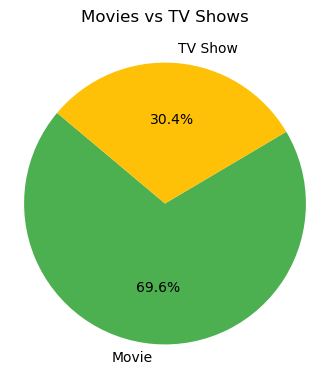

In [59]:
# Count of content types
plt.figure(figsize=(4, 4))
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4CAF50','#FFC107'])
plt.title("Movies vs TV Shows", pad=20)  # Add space above the chart
plt.axis('equal')
plt.show()

### 🌍 Top 10 Countries with Most Netflix Titles

In [78]:
top_countries = df['country'].value_counts().head(10)
top_countries

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

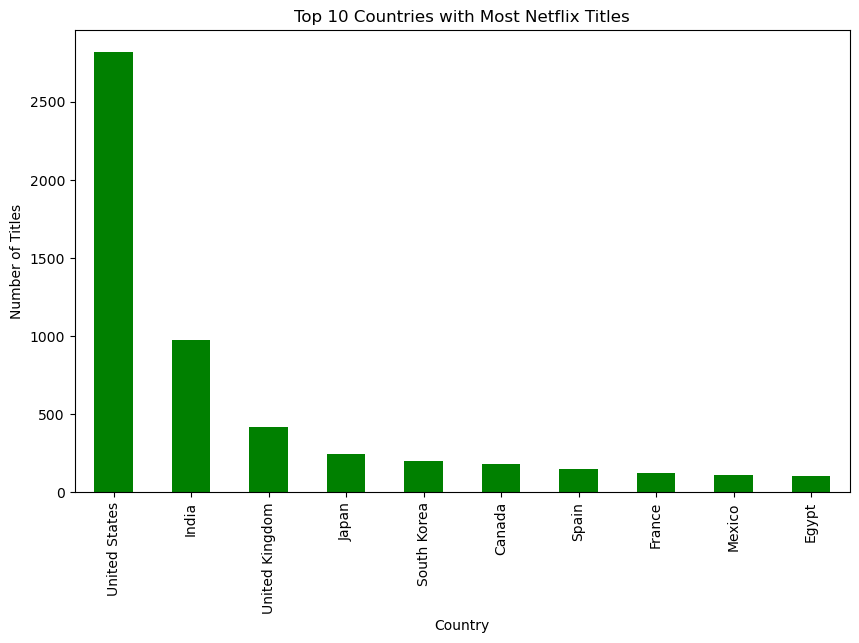

In [17]:
top_countries.plot(kind='bar', figsize=(10, 6), color='green')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()


#### The **United States, India, and the UK** are the top contributors by content count.

### Netflix Titles Added Per Year

C:\Users\prane\AppData\Local\Temp\ipykernel_42416\2686540819.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


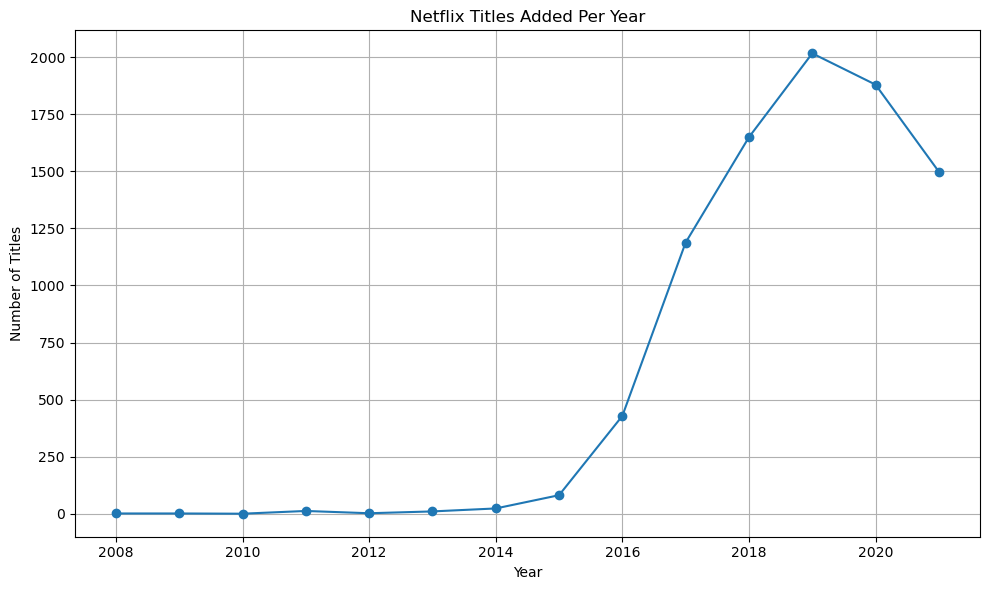

In [77]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

content_per_year = df['year_added'].value_counts().sort_index()

content_per_year.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Netflix Titles Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()

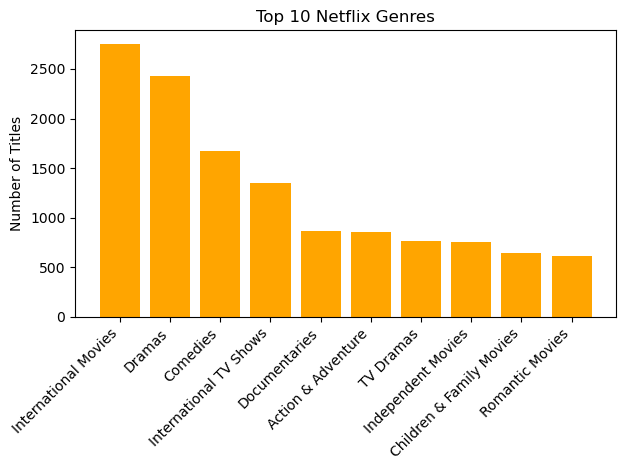

In [76]:
plt.bar(top_genres.keys(), top_genres.values(), color='orange')
plt.title("Top 10 Netflix Genres")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, ha='right')  # Rotate and align
plt.tight_layout()  # Adjusts spacing to fit all labels
plt.show()

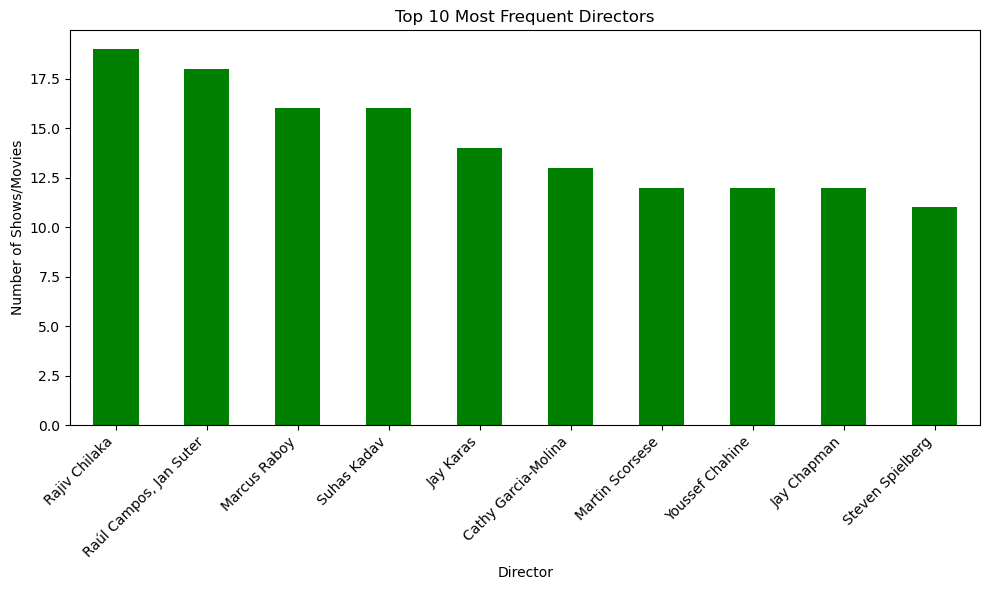

In [75]:
top_directors = df['director'].dropna().value_counts().head(10)

top_directors.plot(kind='bar', figsize=(10,6), color='green')
plt.title("Top 10 Most Frequent Directors")
plt.xlabel("Director")
plt.ylabel("Number of Shows/Movies")
plt.xticks(rotation=45, ha='right')  # Rotate and align
plt.tight_layout()  # Adjusts spacing to fit all labels
plt.show()

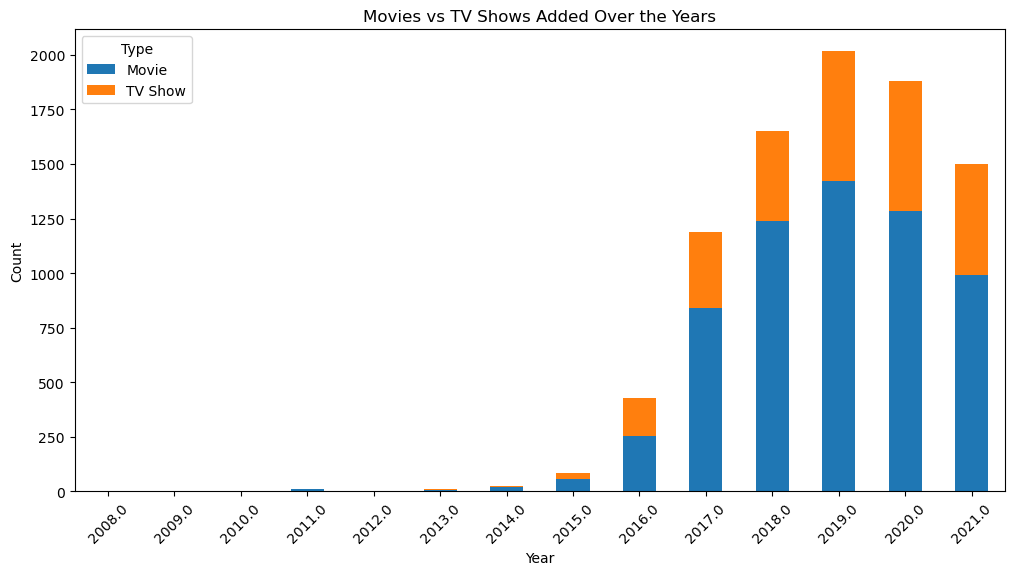

In [79]:
df['year_added'] = df['date_added'].dt.year

type_year = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

type_year.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Movies vs TV Shows Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.show()

### The dip in 2020 content additions reflects the impact of the COVID-19 pandemic, which disrupted global media production and delayed releases. This slowdown was industry-wide, not Netflix-specific.


In [80]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [81]:
# Group by year and type (Movie or TV Show)
content_type_per_year = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Show the result
print(content_type_per_year.tail(20))  # Last 10 years for readability

type         Movie  TV Show
year_added                 
2008.0         1.0      1.0
2009.0         2.0      0.0
2010.0         1.0      0.0
2011.0        13.0      0.0
2012.0         3.0      0.0
2013.0         6.0      5.0
2014.0        19.0      5.0
2015.0        56.0     26.0
2016.0       253.0    176.0
2017.0       839.0    349.0
2018.0      1237.0    412.0
2019.0      1424.0    592.0
2020.0      1284.0    595.0
2021.0       993.0    505.0


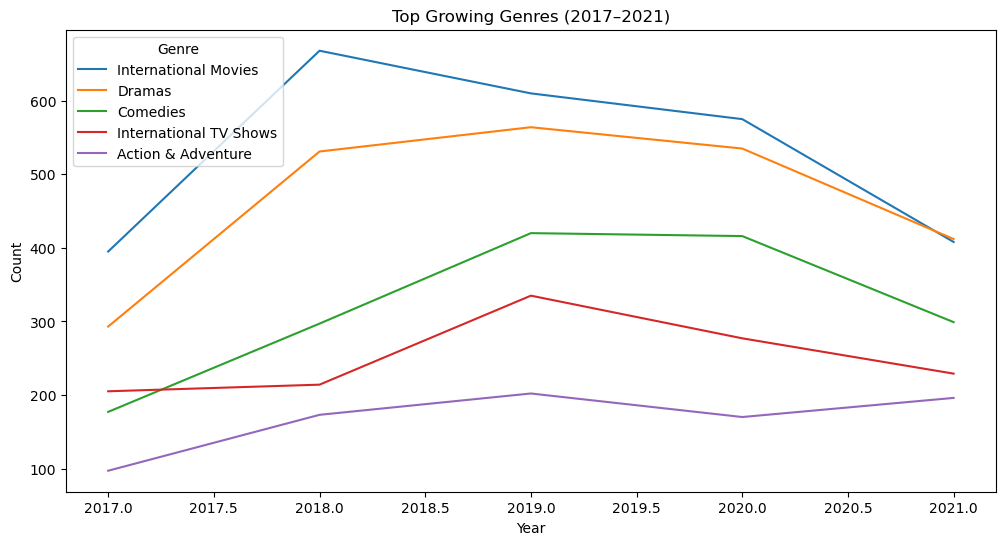

In [83]:
# Extract genres
df['genre_split'] = df['listed_in'].str.split(', ')
df = df.explode('genre_split')

# Filter last 5 years
recent = df[df['year_added'] >= 2017]

# Group by year and genre
genre_trend = recent.groupby(['year_added', 'genre_split']).size().unstack(fill_value=0)

# Plot top growing genres
top_genres = genre_trend.sum().sort_values(ascending=False).head(5).index
genre_trend[top_genres].plot(figsize=(12,6))
plt.title("Top Growing Genres (2017–2021)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Genre")
plt.show()


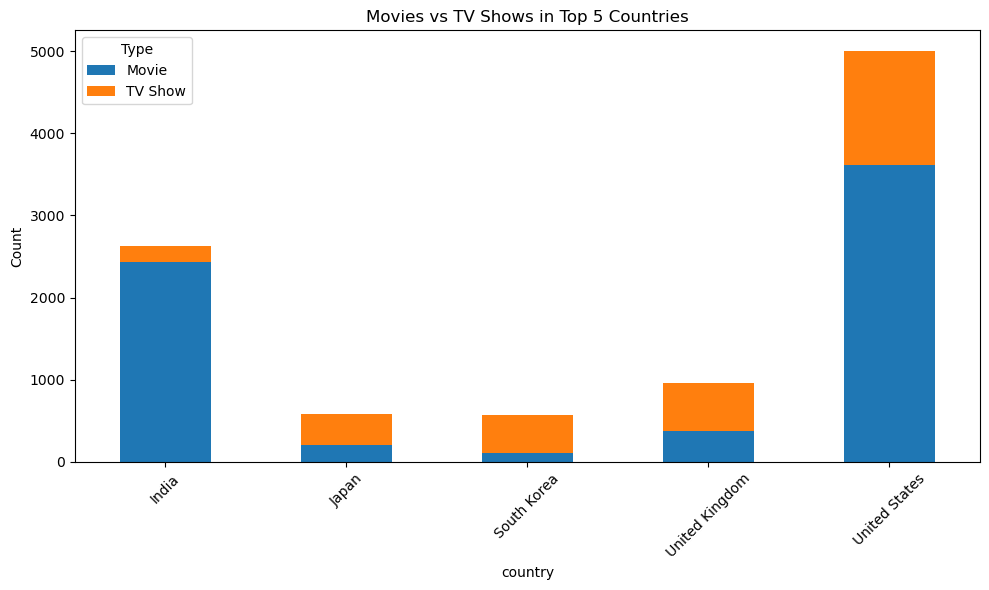

In [85]:
top_countries = df['country'].value_counts().head(5).index
regional_type = df[df['country'].isin(top_countries)].groupby(['country', 'type']).size().unstack()
regional_type.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Movies vs TV Shows in Top 5 Countries")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.tight_layout()
plt.show()

In [87]:
# 1. Identify the top 10 countries by content count
top_10_countries = df['country'].value_counts().head(10).index

# 2. Filter data for those top 10 countries
filtered_df = df[df['country'].isin(top_10_countries)]

# 3. Group by country and type (Movie or TV Show) and count
movie_tv_counts = filtered_df.groupby(['country', 'type']).size().unstack().fillna(0).astype(int)

# 4. Display the result
print(movie_tv_counts)


type            Movie  TV Show
country                       
Canada            228      119
France            190      116
India            2437      189
Japan             200      388
Mexico            155      116
South Korea       107      459
Spain             242      141
Turkey            194       84
United Kingdom    376      581
United States    3617     1385
